In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wave
import sys

In [2]:
def dtft(x, w):
    N = len(x) - 1
    X = np.zeros(1, dtype=complex)
    for n in range(N):
        X += x[n] * np.exp(-1j * w * n)
    return X

def dft(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(((-1j * 2 * np.pi) / N) * n * k)
    return X

def conv(x, h):
    res = np.zeros(len(x))
    for i in range(len(x)):
        for j in range(len(h)):
            if i - j >= 0:
                x_val = x[i - j]
            else:
                x_val = 0
            res[i] += h[j] * x_val
    return res

In [ ]:
fs, sig = wave.read("hasil_audio_noised.wav")
sig_norm = sig / (np.pow(2, 16) - 1)
print(sig_norm)

[ 0.09129473  0.17636378 -0.22278172 ...  0.11752499  0.24867628
  0.16552987]


C:\Users\iqbal\AppData\Local\Temp\ipykernel_7212\282899366.py:40: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 4000)


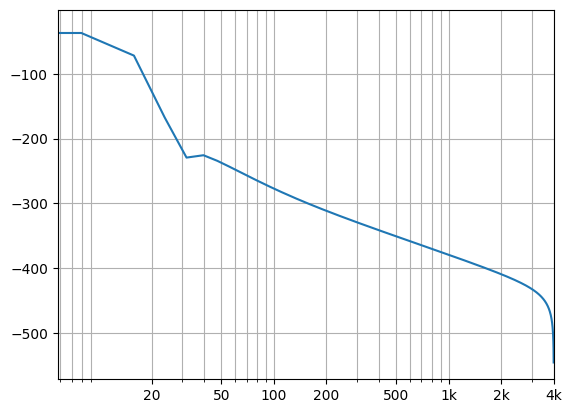

In [9]:
# Parameters
f0 = 5 * np.pi
f1 = 100 * np.pi
fs = 8000

# Transition Bands
w0 = f0 / fs
w1 = f1 / fs

# Filter lengths / order
N = (12 * np.pi) / (w1 - w0)
N = int(np.ceil(N))
a = (N - 1) / 2

# Window Function
wd = np.blackman(N)

# Filter impulse response (hd[n])
hd = np.zeros(N)
for n in range(N):
    if n != a:
        hd[n] = (np.sin(w0 * (n - a)) / (np.pi * (n - a))) * wd[n]
    else:
        hd[n] = (w0 / np.pi) * wd[n]

# Fourier Hd[jw]
Hd = np.fft.fft(hd)
Hd_log = 20 * np.log(np.abs(Hd))

freq = np.zeros(N)
for i in range(N):
    freq[i] = i * fs / N

f_range = freq < fs/2
Hd_log = Hd_log[f_range]
freq = freq[f_range]

plt.plot(freq, Hd_log)
plt.xscale("log")
plt.xlim(0, 4000)
plt.grid(True, which='both')
plt.xticks([20, 50, 100, 200, 500, 1000, 2000, 4000], ['20', '50', '100', '200', '500', '1k', '2k', '4k'])
plt.show()

C:\Users\iqbal\AppData\Local\Temp\ipykernel_7212\397887060.py:26: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax[1, 0].set_xlim(0, 4000)
C:\Users\iqbal\AppData\Local\Temp\ipykernel_7212\397887060.py:34: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax[1, 1].set_xlim(0, 4000)


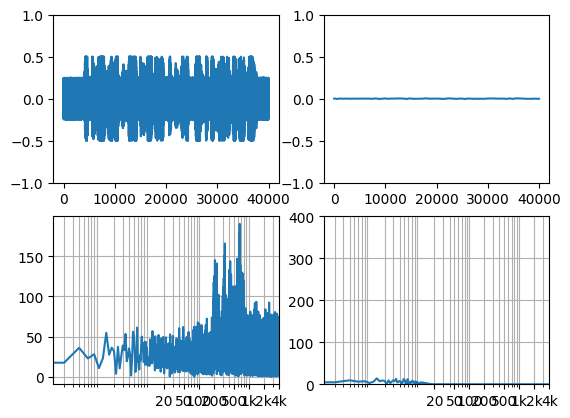

In [32]:
y_filtered = np.convolve(sig_norm, hd, "same")

# Fourier Transform
X = np.fft.fft(sig_norm)
Y = np.fft.fft(y_filtered)

freq = np.zeros(len(sig_norm))
for i in range(len(sig_norm)):
    freq[i] = i * fs / len(sig_norm)

f_range = freq < fs/2
freq = freq[f_range]
X = X[f_range]
Y = Y[f_range]

figure, ax = plt.subplots(2, 2)

ax[0, 0].plot(sig_norm)
ax[0, 0].set_ylim(-1, 1)

ax[0, 1].plot(y_filtered)
ax[0, 1].set_ylim(-1, 1)

ax[1, 0].plot(freq, np.abs(X))
ax[1, 0].set_xscale("log")
ax[1, 0].set_xlim(0, 4000)
ax[1, 1].set_ylim(0, 400)
ax[1, 0].grid(True, which='both')
ax[1, 0].set_xticks([20, 50, 100, 200, 500, 1000, 2000, 4000])
ax[1, 0].set_xticklabels(['20', '50', '100', '200', '500', '1k', '2k', '4k'])

ax[1, 1].plot(freq, np.abs(Y))
ax[1, 1].set_xscale("log")
ax[1, 1].set_xlim(0, 4000)
ax[1, 1].set_ylim(0, 400)
ax[1, 1].grid(True, which='both')
ax[1, 1].set_xticks([20, 50, 100, 200, 500, 1000, 2000, 4000])
ax[1, 1].set_xticklabels(['20', '50', '100', '200', '500', '1k', '2k', '4k'])

plt.show()

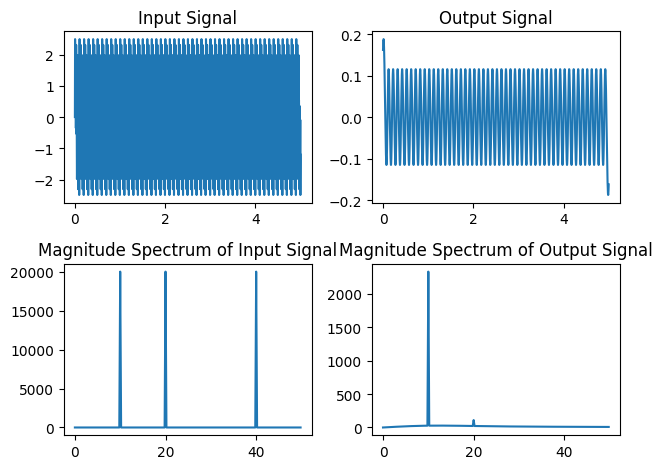

In [12]:
# Signal Generation
dur = 5
t = np.arange(0, dur, 1 / fs)
x = np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 20 * t) + np.sin(2 * np.pi * 40 * t) + np.sin(2 * np.pi * 80 * t)
y = np.convolve(x, hd, "same")

# Fourier Transform
X = np.fft.fft(x)
Y = np.fft.fft(y)

f = np.zeros(len(x))
for i in range(len(x)):
    f[i] = i * fs / len(x)

f_range = f < 50
f = f[f_range]

mag_X = np.abs(X[f_range])
mag_Y = np.abs(Y[f_range])

figure, ax = plt.subplots(2, 2)
ax[0, 0].plot(t, x)
ax[0, 0].set_title("Input Signal")
ax[0, 1].plot(t, y)
ax[0, 1].set_title("Output Signal")
ax[1, 0].plot(f, mag_X)
ax[1, 0].set_title("Magnitude Spectrum of Input Signal")
ax[1, 1].plot(f, mag_Y)
ax[1, 1].set_title("Magnitude Spectrum of Output Signal")
plt.tight_layout()
plt.show()